# Credit EDA Case Study

### Importing Warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Importing Python Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Displaying All Columns and rows

In [3]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

### Reading the dataset

In [4]:
#Loading the application_data file
application_data = pd.read_csv("application_data.csv")
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Checking structure of the data

In [5]:
application_data.shape

(307511, 122)

In [6]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

# Data Cleaning

### Missing Values in application dataset

In [8]:
#Checking percentage of missing values for all the columns
null_percent = 100.0*application_data.isnull().sum()/len(application_data)
null_percent

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [9]:
#Let's count the columns having more than or equal to 40% null values ?
len(null_percent[null_percent >= 40])

49

There are 49 columns in application_data file having high missing value percentage.
Considering 40% as the threshold value, We can drop the columns having missing value percentage as >=40%

In [10]:
application_data = application_data.loc[:, 100*application_data.isnull().sum()/len(application_data) < 40]

In [11]:
#Let's check the structure of data again
application_data.shape

(307511, 73)

In [12]:
#Checking the percentage of missing values for all the columns again to ensure removing of missing values
null_percent = 100.0*application_data.isnull().sum()/len(application_data)
null_percent

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

### Imputing the Missing Values

In [13]:
#'OCCUPATION_TYPE' has higher null value percentage(31.35%).
# So we can impute it with a new category "Missing".

application_data['OCCUPATION_TYPE'].fillna(value="Missing", inplace=True)

In [14]:
# EXT_SOURCE_3 has 19.8% null values. 
# Lets check the mean and median.

application_data.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

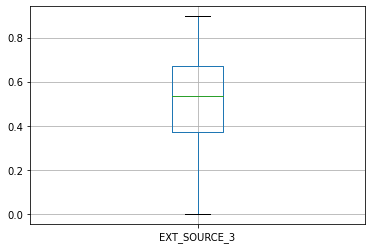

In [15]:
application_data.boxplot(column=['EXT_SOURCE_3'])
plt.show()

In [16]:
# From box plot it seems, mean and median are almost near and no outliers but there is some tilt towards outliers.
# Hence we will impute with median as it wont cause any issue with our analysis.

application_data['EXT_SOURCE_3'].fillna(application_data['EXT_SOURCE_3'].median(), inplace=True)

In [17]:
# We will impute columns with around 13% missing values with Mode Since they all are number of credit inquiries.
# And that's why replacing missing values with the most frequent value (mode) will make more sense here.

application_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0], inplace=True)

In [18]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0], inplace=True)

In [19]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0], inplace=True)

In [20]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0], inplace=True)

In [21]:
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0], inplace=True)

In [22]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0], inplace=True)

In [23]:
# 'NAME_TYPE_SUITE' is an object category with 0.42% null values.
# So we will impute it with the most frequent category using mode()[0].

application_data['NAME_TYPE_SUITE'].fillna(application_data['NAME_TYPE_SUITE'].mode()[0], inplace=True)

From the list of missing value percentage, the columns that has less than 1% missing values are
AMT_ANNUITY ,AMT_GOODS_PRICE, CNT_FAM_MEMBERS, EXT_SOURCE_2, OBS_30_CNT_SOCIAL_CIRCLE,
DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE

We will take 1 column at a time

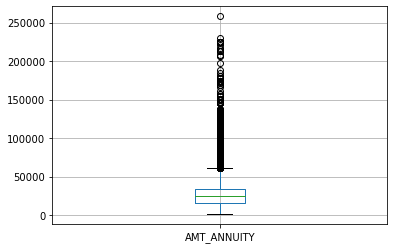

In [24]:
# AMT_ANNUITY

application_data.boxplot(column=['AMT_ANNUITY'])
plt.show()

In [25]:
# from box plot it seems, it has lot of outliers so imputing with median value
application_data['AMT_ANNUITY'].fillna(application_data['AMT_ANNUITY'].median(), inplace=True)

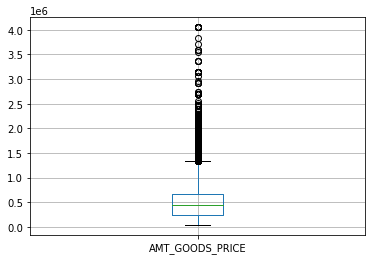

In [26]:
# AMT_GOODS_PRICE

application_data.boxplot(column=['AMT_GOODS_PRICE'])
plt.show()

In [27]:
# from box plot it seems, it has lot of outliers so imputing with median value
application_data['AMT_GOODS_PRICE'].fillna(application_data['AMT_GOODS_PRICE'].median(), inplace=True)

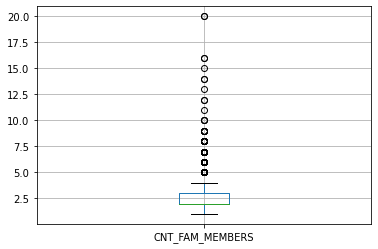

In [28]:
#CNT_FAM_MEMBERS

application_data.boxplot(column=['CNT_FAM_MEMBERS'])
plt.show()

In [29]:
# from box plot it seems, it has lot of outliers so imputing with median value
application_data['CNT_FAM_MEMBERS'].fillna(application_data['CNT_FAM_MEMBERS'].median(), inplace=True)

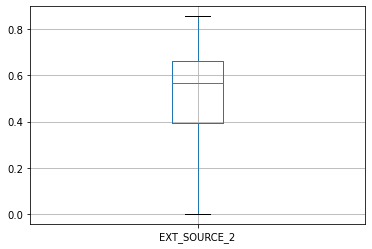

In [30]:
#EXT_SOURCE_2

application_data.boxplot(column=['EXT_SOURCE_2'])
plt.show()

In [31]:
# From box plot it seems, no outliers here but there is some tilt towards outliers.
# Hence we will consider median for imputation.
application_data['EXT_SOURCE_2'].fillna(application_data['EXT_SOURCE_2'].median(), inplace=True)

In [32]:
#OBS_30_CNT_SOCIAL_CIRCLE
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(application_data['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

In [33]:
#DEF_30_CNT_SOCIAL_CIRCLE
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(application_data['DEF_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

In [34]:
#OBS_60_CNT_SOCIAL_CIRCLE
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(application_data['OBS_60_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

In [35]:
#DEF_60_CNT_SOCIAL_CIRCLE
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(application_data['DEF_60_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

In [36]:
#DAYS_LAST_PHONE_CHANGE
application_data['DAYS_LAST_PHONE_CHANGE'].fillna(application_data['DAYS_LAST_PHONE_CHANGE'].median(), inplace=True)

In [37]:
# After Imputing, NO NULLS FOUND
100.0*application_data.isnull().sum()/len(application_data)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS     

In [38]:
# Describing the Gender column to check the number of females and males

application_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [39]:
# We can observe that 4 'XNA' values in Gender_Code Column, which can be imputed by Female i.e. mode of the Gender_Code 
# because around 65% are females of the total records, So adding 4 more records will not impact our analysis.
application_data.loc[application_data.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'

In [40]:
#Let's check again
application_data['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

# Identifying Outliers

 By plotting box plot, we can check that if there are vaues existing which are above upper whisker(maximum) or not. 
 
 Q1 = application_data.column.quantile(0.25)
 
 Q3 = application_data.column.quantile(0.75)
 
 IQR = Q3 - Q1
 
 lowerwhisker=(Q1 - 1.5 * IQR)
 
 upperwhisker=(Q3 + 1.5 * IQR)
 
 The values above the upper whisker and below the lower whisker are considered as outliers

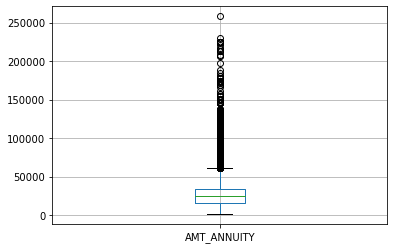

In [41]:
# AMT_ANNUITY

application_data.boxplot(column=['AMT_ANNUITY'])
plt.show()

Here we can consider count greater than  61704.0 (Upper Whisker) as an outlier.

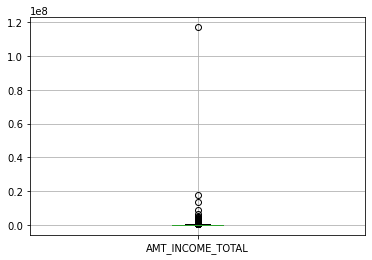

In [42]:
# AMT_INCOME_TOTAL

application_data.boxplot(column=['AMT_INCOME_TOTAL'])
plt.show()

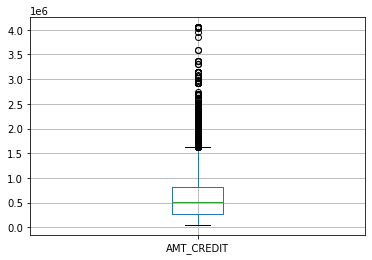

In [43]:
# AMT_CREDIT

application_data.boxplot(column=['AMT_CREDIT'])
plt.show()

Here we can say that The amount credited greater than 1616625.0 (Upper Whisker) can be considered as an outlier

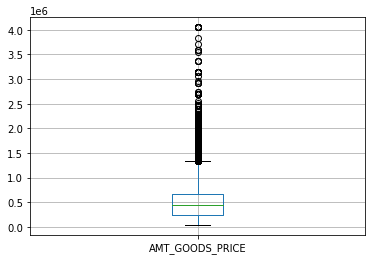

In [44]:
# AMT_GOODS_PRICE

application_data.boxplot(column=['AMT_GOODS_PRICE'])
plt.show()

we can say that count greater than  1341000.0 (Upper Whisker) as an outlier.

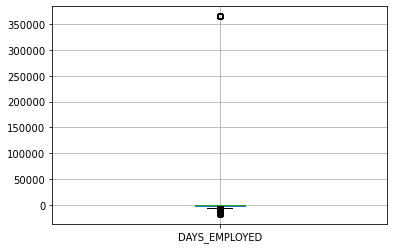

In [45]:
# DAYS_EMPLOYED

application_data.boxplot(column=['DAYS_EMPLOYED'])
plt.show()

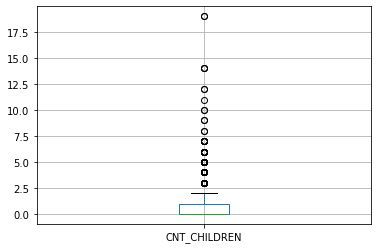

In [46]:
# CNT_CHILDREN

application_data.boxplot(column=['CNT_CHILDREN'])
plt.show()

The values greater than 2.5 (Upper Whisker)are considered to be outliers.
As count of children cannot be in decimals we can say that count greater than 3 can be an outlier

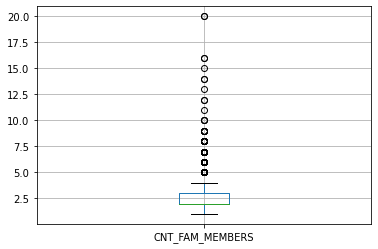

In [47]:
#CNT_FAM_MEMBERS

application_data.boxplot(column=['CNT_FAM_MEMBERS'])
plt.show()

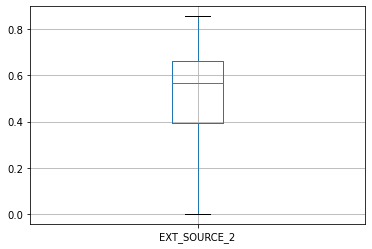

In [48]:
#EXT_SOURCE_2

application_data.boxplot(column=['EXT_SOURCE_2'])
plt.show()

From above we can say that:

1. AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN these columns have some outliers.
2. AMT_INCOME_TOTAL has large number of outliers that shows few of the loan applicants have high income as compared to the others.
3. EXT_SOURCE_2 has no outliers that means the data available is reliable.
4. DAYS_EMPLOYED has outlier values around 3,50,000 (days) that is around 958 years which is not possible and hence this has to be incorrect entry.

# Standardize Values

In [49]:
# Let's check the datatypes of all the columns and change the data type like negative age and date
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [50]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Here we have some negative values in columns starting with "DATE"

In [51]:
# converting negative DAYS_BIRTH value to positive value
application_data['DAYS_BIRTH']=application_data['DAYS_BIRTH'].abs()

In [52]:
# converting negative DAYS_EMPLOYED value to positive value
application_data['DAYS_EMPLOYED']=application_data['DAYS_EMPLOYED'].abs()

In [53]:
# converting negative DAYS_REGISTRATION value to positive value
application_data['DAYS_REGISTRATION']=application_data['DAYS_REGISTRATION'].abs()

In [54]:
# converting negative DAYS_ID_PUBLISH value to positive value
application_data['DAYS_ID_PUBLISH']=application_data['DAYS_ID_PUBLISH'].abs()

In [55]:
# converting negative DAYS_LAST_PHONE_CHANGE value to positive value
application_data['DAYS_LAST_PHONE_CHANGE']=application_data['DAYS_LAST_PHONE_CHANGE'].abs()

In [56]:
# Let's check whether negative values are converted into positive or not
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Binning Numerical Columns to create a categorical column

### AMT_INCOME_TOTAL

In [57]:
application_data['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [58]:
# AMT_INCOME_TOTAL

Q1 = application_data['AMT_INCOME_TOTAL'].quantile(0.25)
Q2 = application_data['AMT_INCOME_TOTAL'].quantile(0.50)
Q3 = application_data['AMT_INCOME_TOTAL'].quantile(0.75)
M = application_data['AMT_INCOME_TOTAL'].max()

# We can Bin AMT_INCOME_TOTAL into AMT_INCOME_TOTAL_GROUP so we don't loose data.

application_data['AMT_INCOME_TOTAL_GROUP'] = pd.cut(application_data['AMT_INCOME_TOTAL'],[ Q1, Q2, Q3, M ], labels = ['Low', 'medium', 'High'])
application_data.AMT_INCOME_TOTAL_GROUP.value_counts()

medium    82213
High      71538
Low       53182
Name: AMT_INCOME_TOTAL_GROUP, dtype: int64

### AMT_CREDIT

In [59]:
# AMT_CREDIT

Q1 = application_data['AMT_CREDIT'].quantile(0.25)
Q2 = application_data['AMT_CREDIT'].quantile(0.50)
Q3 = application_data['AMT_CREDIT'].quantile(0.75)
M = application_data['AMT_CREDIT'].max()

# We can Bin AMT_CREDIT into AMT_CREDIT_GROUP so we will not loose any data.

application_data['AMT_CREDIT_GROUP'] = pd.cut(application_data['AMT_CREDIT'],[Q1, Q2, Q3, M ], labels = ['Low', 'medium', 'High'])
application_data.AMT_CREDIT_GROUP.value_counts()

medium    77786
High      75876
Low       75428
Name: AMT_CREDIT_GROUP, dtype: int64

In [60]:
#Checking the number of unique values each column possess to identify categorical columns
application_data.nunique().sort_values(ascending=False)

SK_ID_CURR                     307511
EXT_SOURCE_2                   119828
DAYS_BIRTH                      17460
DAYS_REGISTRATION               15688
AMT_ANNUITY                     13672
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
AMT_CREDIT                       5603
DAYS_LAST_PHONE_CHANGE           3773
AMT_INCOME_TOTAL                 2548
AMT_GOODS_PRICE                  1002
EXT_SOURCE_3                      814
REGION_POPULATION_RELATIVE         81
ORGANIZATION_TYPE                  58
OBS_30_CNT_SOCIAL_CIRCLE           33
OBS_60_CNT_SOCIAL_CIRCLE           33
AMT_REQ_CREDIT_BUREAU_YEAR         25
AMT_REQ_CREDIT_BUREAU_MON          24
HOUR_APPR_PROCESS_START            24
OCCUPATION_TYPE                    19
CNT_FAM_MEMBERS                    17
CNT_CHILDREN                       15
AMT_REQ_CREDIT_BUREAU_QRT          11
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_DAY           9
AMT_REQ_CREDIT_BUREAU_WEEK          9
DEF_60_CNT_S

# Data Analysis

In [61]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_GROUP,AMT_CREDIT_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,medium,Low
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low


## Imbalance Analysis of application_data file

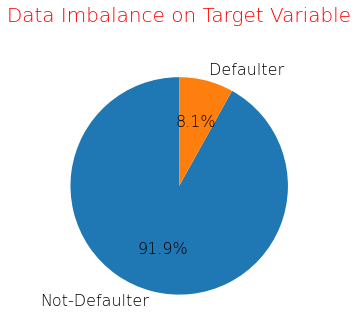

In [64]:
#Checking the imbalance percentage.

lables = 'Not-Defaulter','Defaulter'
plt.figure(figsize = [5,5])

plt.pie(application_data["TARGET"].value_counts(), labels=lables, autopct='%1.1f%%', 
        textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'}, startangle=90)

# Adding and formatting title
plt.title("Data Imbalance on Target Variable\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Red'})

plt.show()

### In application_data there exists 91.9% of "Non defaulter" and 8.1% of "defaulter" customers.
### So this is an Imbalance Dataset

In [65]:
# Dividing this dataset into two different datasets based upon the target value i.e., Target-1 and Target-0
Target_1 = application_data[application_data['TARGET']==1]
Target_0 = application_data[application_data['TARGET']==0]

In [66]:
Target_1.shape

(24825, 75)

In [67]:
Target_0.shape

(282686, 75)

## Univariate Analysis

### Categorical Variables Analysis

Perfeorming analysis for one column at a time

Performing univariate analysis for categoriacal variables for both 0 and 1

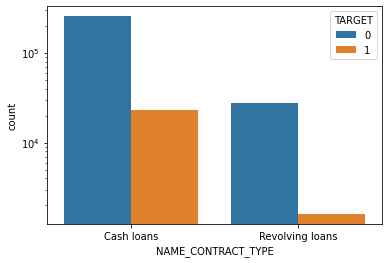

In [87]:
sns.countplot(x = "NAME_CONTRACT_TYPE", data=application_data, hue ="TARGET",)
plt.yscale('log')
plt.show()

Observation for Name_Contract_type: Revolving loans are just a small fraction from the total number of loans.

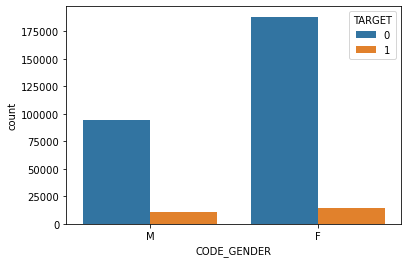

In [92]:
sns.countplot(x = "CODE_GENDER", data = application_data, hue ="TARGET",)
plt.show()

Observation: The number of female clients is more than the number of male clients. 
Also males have a higher chance of not returning their loans when compared with females

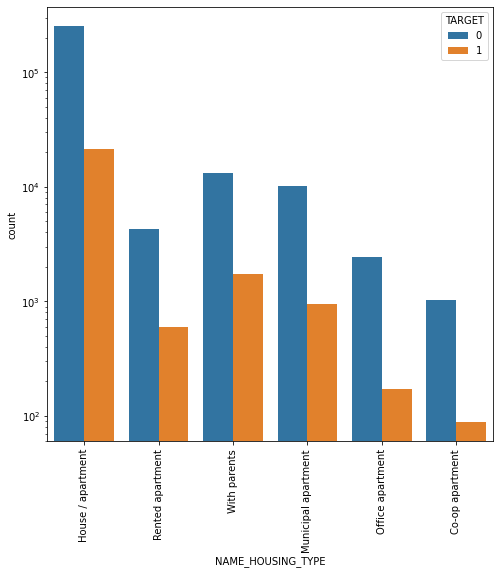

In [89]:
plt.figure(figsize= [8,8])
sns.countplot(x = "NAME_HOUSING_TYPE", data = application_data, hue ="TARGET",)
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

Observations:
Most of the people live in House/apartment
People living in Co-op apartments have lowest default rate
And People living with parents and living in rented apartments have chances of defaulting

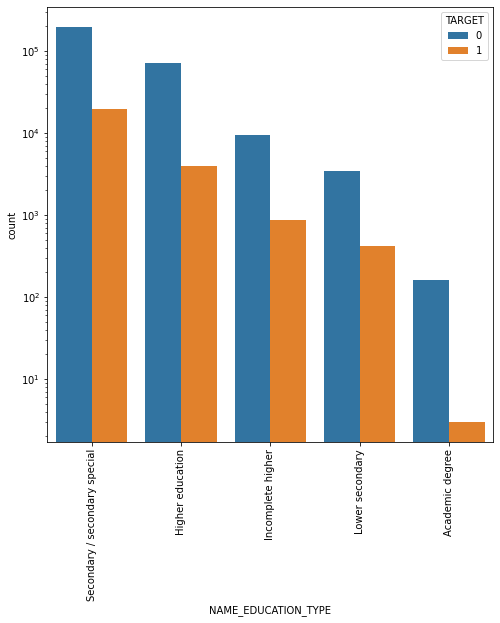

In [90]:
plt.figure(figsize= [8,8])
sns.countplot(x = "NAME_EDUCATION_TYPE", data = application_data, hue ="TARGET",)
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

Observations:
Most of the clients have Secondary / secondary special education which are followed by clients with Higher education. 
Clients having academic degree are less in numbers.
Though the Lower secondary category are lower in numbers but may have the chances of defaulters.

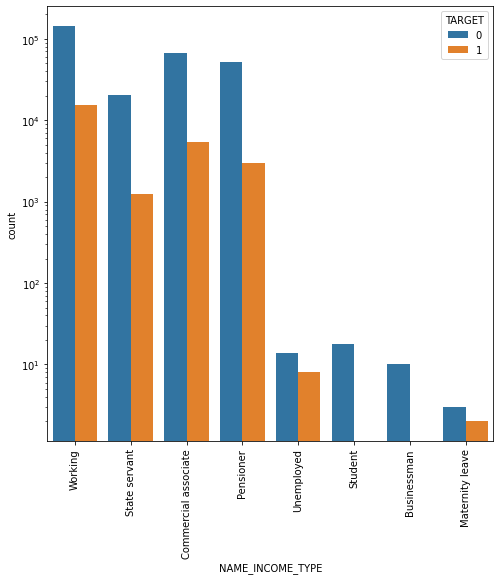

In [91]:
plt.figure(figsize= [8,8])
sns.countplot(x = "NAME_INCOME_TYPE", data = application_data, hue ="TARGET",)
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

Observations:
Most of clients for loans have income type as Working, followed by Commercial associate, Pensioner and State servant.
Student and Businessmen, though found less in numbers do not have any default record. Hence these 2 categories are safe for providing loan.

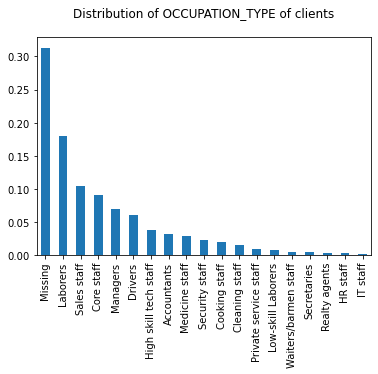

In [84]:
# Checking Distribution of OCCUPATION_TYPE of Clients
application_data.OCCUPATION_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Distribution of OCCUPATION_TYPE of clients\n')
plt.show()

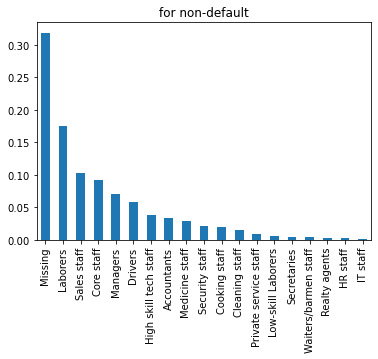

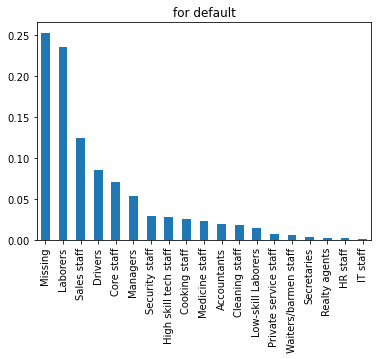

In [85]:
# for TARGET=0
Target_0.OCCUPATION_TYPE.value_counts(normalize=True).plot.bar()
plt.title('for non-default')
plt.show()

# for TARGET=1
Target_1.OCCUPATION_TYPE.value_counts(normalize=True).plot.bar()
plt.title('for default')
plt.show()

Observations:
Most of the loans are taken by people whose Occupation is "Missing" in the dataset followed by Laborers, Sales staff. 
IT staff take the lowest amount of loans.
The category with highest percent of not repaid loans are Low-skill Laborers, followed by sales staff and Drivers.

#### Let's Compare some other target variable across the categories of categorical variables against Target 0 and 1

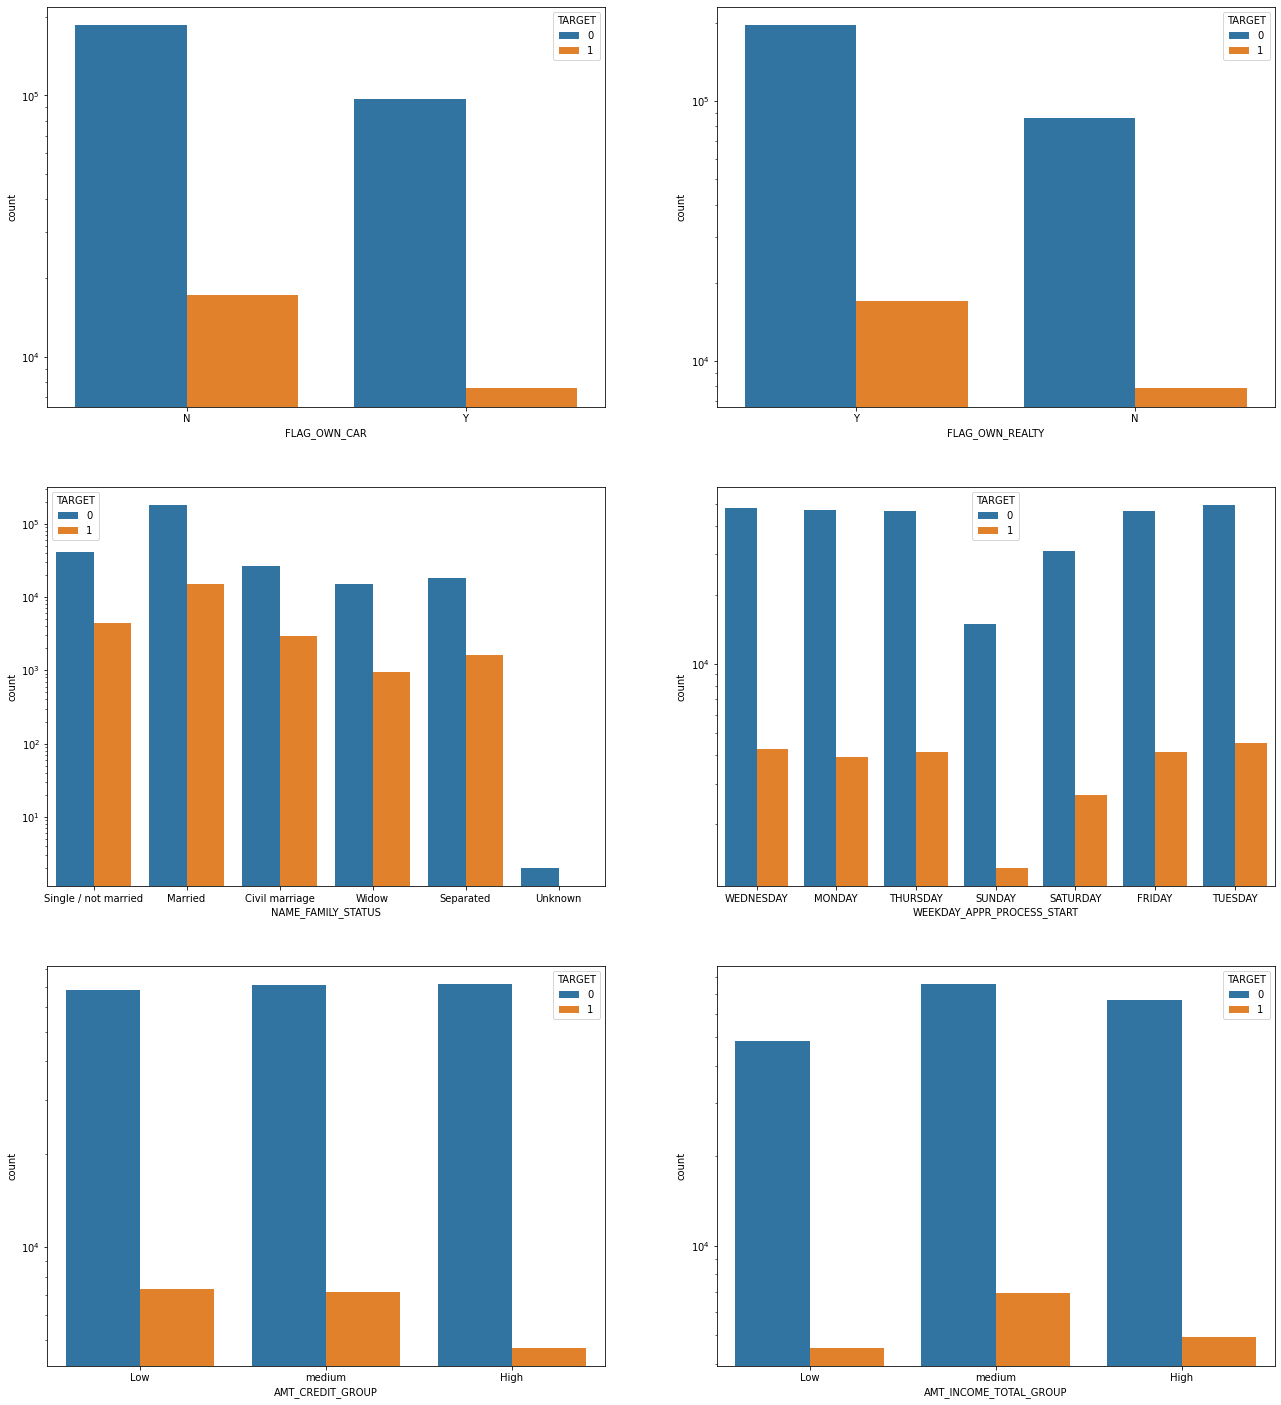

In [86]:
categorical_columns=['FLAG_OWN_CAR','FLAG_OWN_REALTY',
                     'NAME_FAMILY_STATUS',
                    'WEEKDAY_APPR_PROCESS_START','AMT_CREDIT_GROUP','AMT_INCOME_TOTAL_GROUP']

plt.figure(figsize=(22,25))
for i in (enumerate(categorical_columns)):
    plt.subplot(len(categorical_columns)//2, 2, i[0]+1)
    sns.countplot(x = i[1], hue='TARGET', data = application_data)
    plt.yscale('log')
    
plt.show()

#### Observations from Univariate Categorical Analysis

we can see from above graphs:

Female tends to take more loans than Males

People with Medium total income may default more.

Clients having high Credit amount are less likely to default.

People who lives in house/appartment are taking more loans.

Married people are taking more Loan as compaired to other categories.

we can conclude that secondary/special educated loan applyer are in high in number.

People with real estate are likey to take more loans.

People who don't have a car tends to take more loans.

People tend to take more cash loans, and default chances of revolving loans is less.

People who have started application process on sunday are less chances to default.

Saturday and sunday are not too busy for bank in terms of loan applications.

#### Now we will Compare the target variable across some numerical variables against Target 0 and 1

## Numerical Univariate Analysis

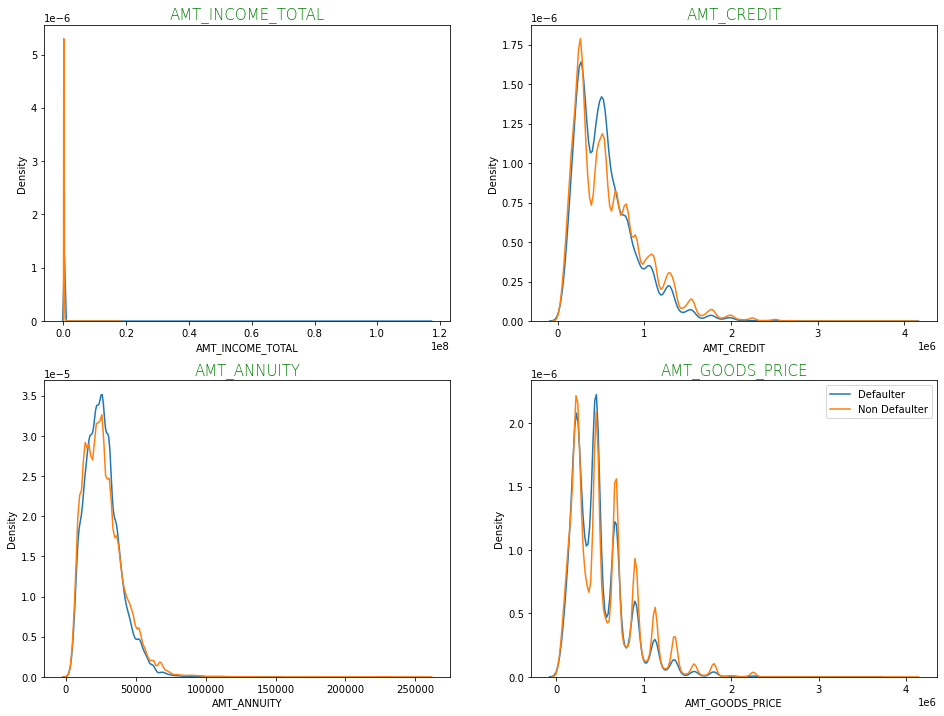

In [94]:
# We will Plot the numerical columns related to amount as distribution plot

Money = application_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

plt.figure(figsize=(16,12))

for i in enumerate(Money):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Target_1[i[1]], hist=False, label ="Defaulter")
    sns.distplot(Target_0[i[1]], hist=False, label ="Non Defaulter")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Green'}) 
    
plt.legend()

plt.show()

Observations:

Most number of loans are given for goods price below 10 laca mount.

Most number of people are paying annuity less than 50000 for the credit loan.

The Non defaulters and defaulters distribution overlap in all the plots and hence we cannot use any of these variables to make a decision.

Credit amount of the loan is less then 10 lacs amount.

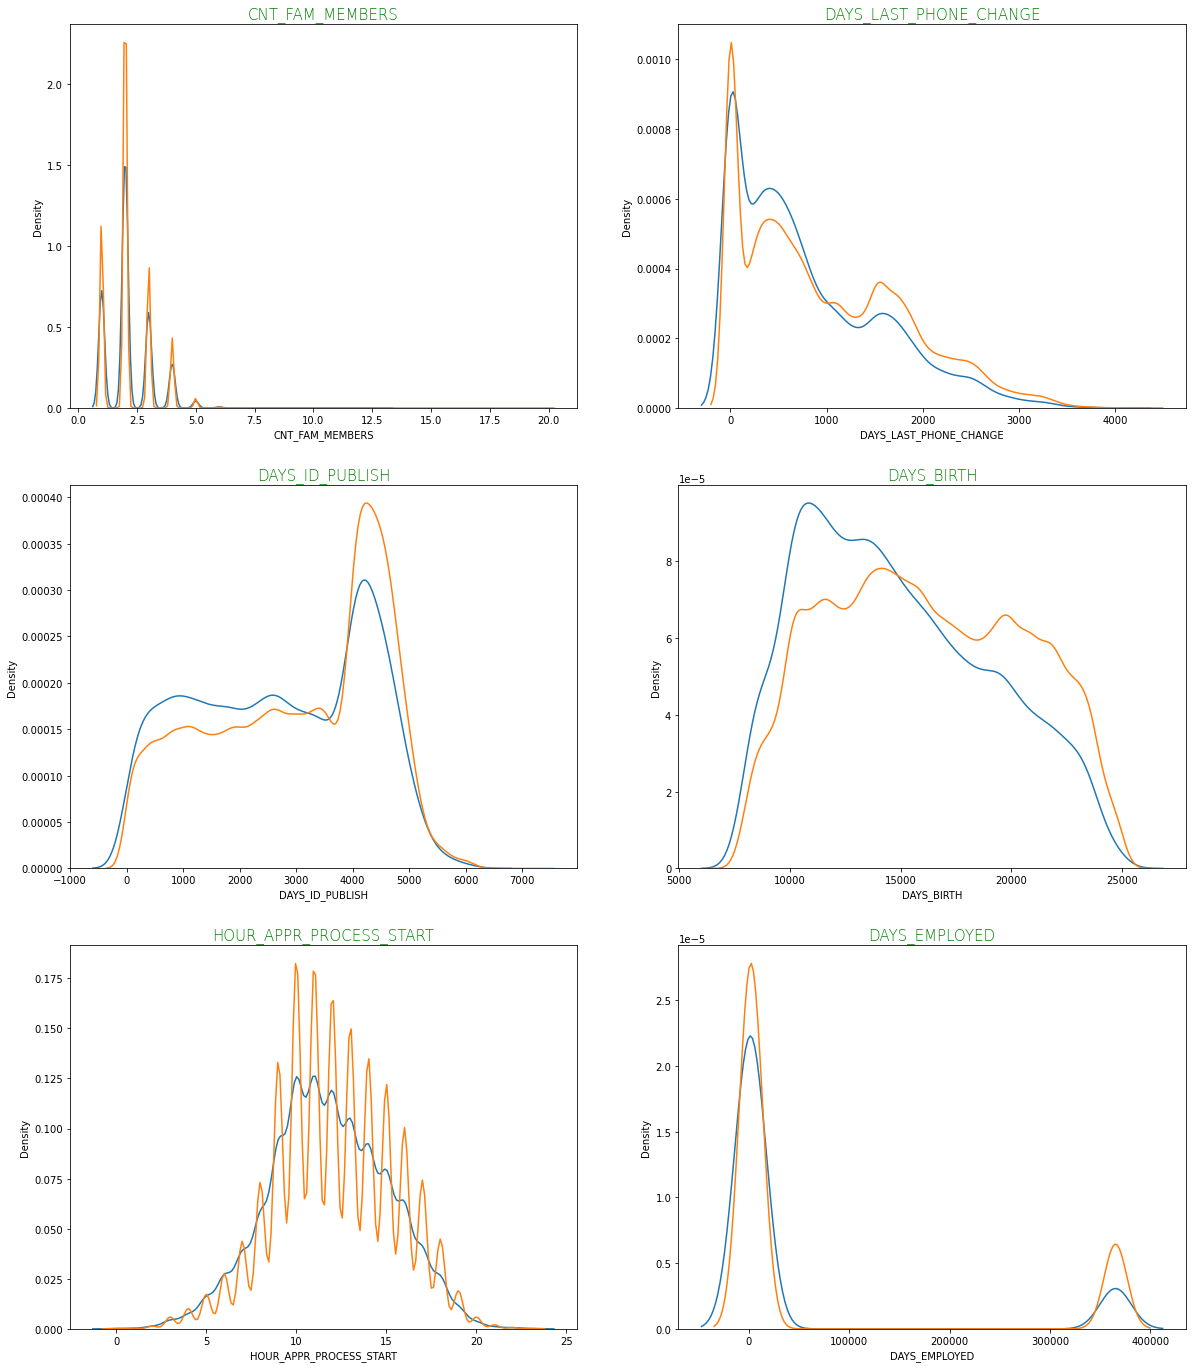

In [96]:
other_columns=['CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','DAYS_BIRTH','HOUR_APPR_PROCESS_START',
                   'DAYS_EMPLOYED']

plt.figure(figsize=(20,24))

for i in (enumerate(other_columns)):
    plt.subplot(3, 2, i[0]+1)
    sns.distplot(Target_1[i[1]].dropna(), hist=False, label='Defaulter')
    sns.distplot(Target_0[i[1]].dropna(), hist=False, label='Non defaulter')
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Green'})
plt.show()    

Observations:
We can see from above graphs

Nuclear family are taking more loans.

People who just got employed likely to take more loans.

People with age between 10000-days and 15000-days yrs likely to take more loans.

People who retired likely to take more loans.

People whose ids got published between 4000 days and 5000 days ago are likely to take more loans.

High number of applications are filed in 10 AM to 2 PM.

## Bivariate Analysis

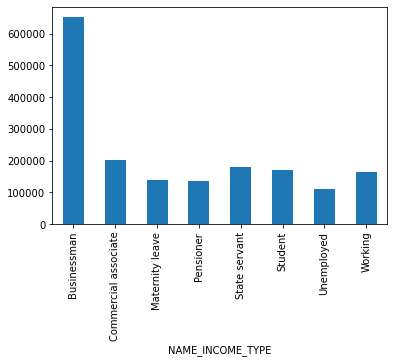

In [108]:
application_data.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].mean().plot.bar()
plt.show()

In [111]:
application_data.groupby('CNT_FAM_MEMBERS')['AMT_CREDIT'].mean()

CNT_FAM_MEMBERS
1.0     5.119075e+05
2.0     6.312042e+05
3.0     6.078110e+05
4.0     6.111331e+05
5.0     6.131663e+05
6.0     6.241107e+05
7.0     5.791943e+05
8.0     4.883855e+05
9.0     5.102835e+05
10.0    5.450400e+05
11.0    5.264910e+05
12.0    1.049085e+05
13.0    1.007762e+06
14.0    4.743900e+05
15.0    1.085058e+06
16.0    7.070760e+05
20.0    2.022750e+05
Name: AMT_CREDIT, dtype: float64

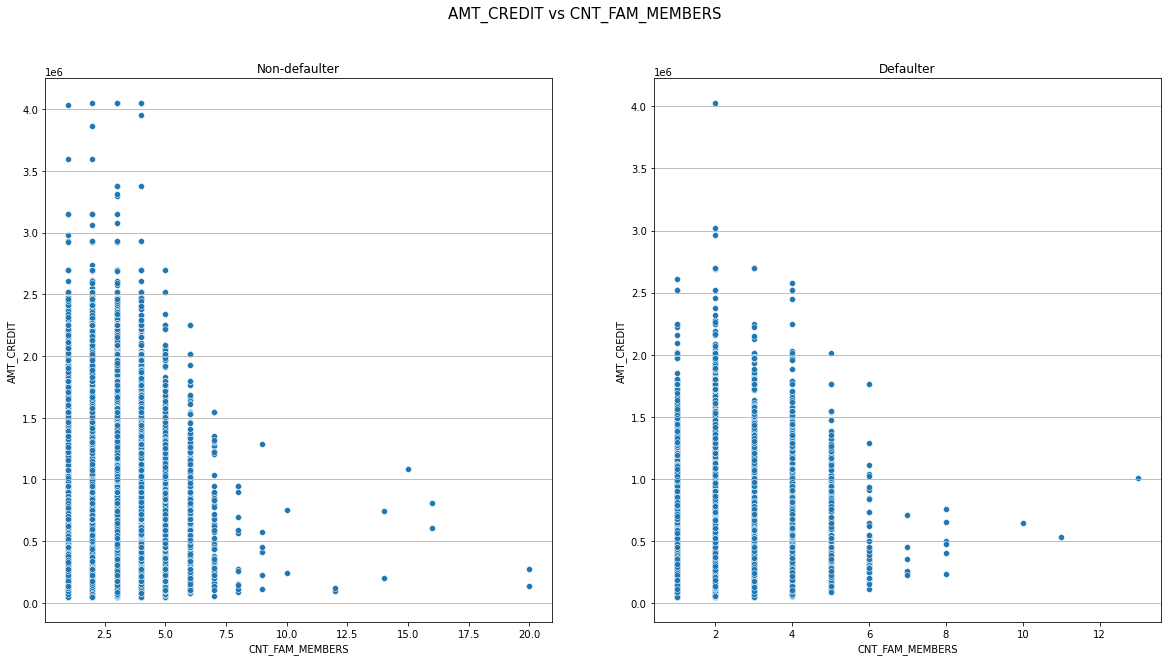

In [110]:
#Let's see relation between CNT_FAM_MEMBERS and  AMT_CREDIT and its effect on loan repayment status
plt.figure(figsize=[20,10])
plt.suptitle("AMT_CREDIT vs CNT_FAM_MEMBERS", fontsize = 15)
plt.subplot(1, 2, 1)
sns.scatterplot(data = Target_0, x='CNT_FAM_MEMBERS', y='AMT_CREDIT')
plt.title("Non-defaulter")
plt.grid(axis='y')
plt.subplot(1, 2, 2)
sns.scatterplot(data = Target_1, x='CNT_FAM_MEMBERS', y='AMT_CREDIT')
plt.grid(axis='y')
plt.title("Defaulter")

plt.show()

Observations:

Clients who has Big family size and low credit amount may default less.

Clients who has small family size and higher Amount credit may default less.

## Multivariate Analysis

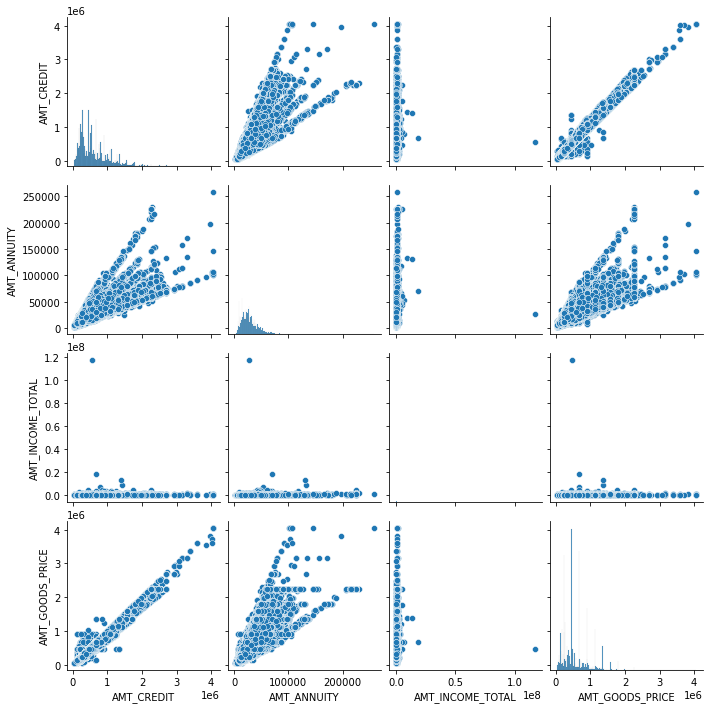

In [97]:
# We can plot pairplot between amount related variables
sns.pairplot(application_data[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE']])
plt.show()

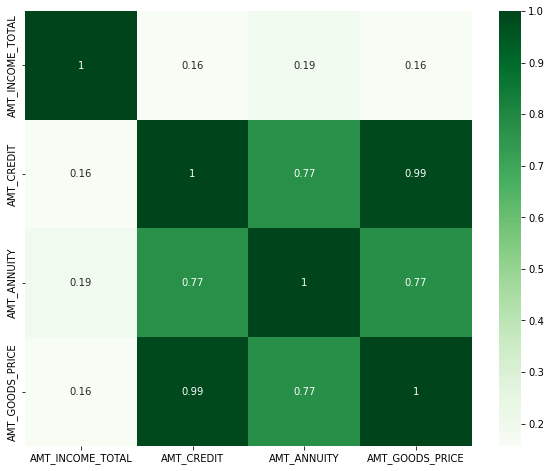

In [102]:
#We can check Correlation between these above variables

plt.figure(figsize=[10,8])
sns.heatmap(application_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']].corr(), annot=True, cmap ="Greens")
plt.show()

Observations:

Applicants owning goods of higher value may go for loans of higher amounts.

High correlation between AMT_CREDIT and AMT_GOODS_PRICE.

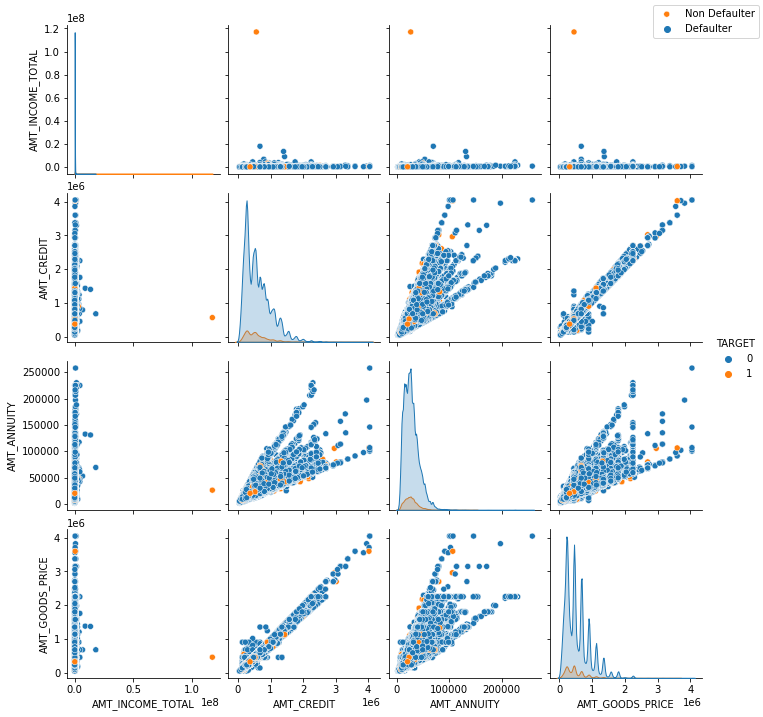

In [103]:
# Again Plotting pairplot between amount variable but this time to draw its relation with loan payment status

Amount_1 = application_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
Amount_1 = Amount_1[(Amount_1["AMT_GOODS_PRICE"].notnull()) & (Amount_1["AMT_ANNUITY"].notnull())]
ax_1= sns.pairplot(Amount_1, hue="TARGET")
ax_1.fig.legend(labels=['Non Defaulter','Defaulter'])
plt.show()

Observations:

AMT_CREDIT and AMT_GOODS_PRICE are highly correlated as based on the scatterplot.

There are very less defaulters where AMT_CREDIT >3M.

When AMT_ANNUITY >15000 and AMT_GOODS_PRICE > 3M then there is low chance of defaulter.

## Correlation between more numeric variable

In [112]:
# checking the correlation for the Target_0 (Non defaulter) data
corr_Target_0 = Target_0.corr()
corr_Target_0 = corr_Target_0.where(np.triu(np.ones(corr_Target_0.shape), k=1).astype(np.bool))
corr_non_defaulter = corr_Target_0.unstack().reset_index()
corr_non_defaulter.columns =['VAR1','VAR2','Correlation']
corr_non_defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_non_defaulter["Correlation"] = corr_non_defaulter["Correlation"].abs() # converting -ve values to +ve
corr_non_defaulter.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_non_defaulter.head(10)

,VAR1,VAR2,Correlation
802,FLAG_EMP_PHONE,DAYS_EMPLOYED,0.999756
1982,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998510
370,AMT_GOODS_PRICE,AMT_CREDIT,0.987022
1239,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149
1100,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
1487,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861
2044,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.859371
1673,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.830381
371,AMT_GOODS_PRICE,AMT_ANNUITY,0.776421
309,AMT_ANNUITY,AMT_CREDIT,0.771297


In [115]:
# checking the correlation for the Target_1 (Defaulter) data
corr_Target_1 = Target_1.corr()
corr_Target_1 = corr_Target_1.where(np.triu(np.ones(corr_Target_1.shape), k=1).astype(np.bool))
corr_defaulter = corr_Target_1.unstack().reset_index()
corr_defaulter.columns =['VAR1','VAR2','Correlation']
corr_defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_defaulter["Correlation"] = corr_defaulter["Correlation"].abs() # converting -ve values to +ve
corr_defaulter.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_defaulter.head(10)

,VAR1,VAR2,Correlation
802,FLAG_EMP_PHONE,DAYS_EMPLOYED,0.999705
1982,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998270
370,AMT_GOODS_PRICE,AMT_CREDIT,0.982783
1239,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637
1100,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
2044,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.869016
1487,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847885
1673,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.778540
371,AMT_GOODS_PRICE,AMT_ANNUITY,0.752295
309,AMT_ANNUITY,AMT_CREDIT,0.752195


Observations:

In case of defaulter, major portion of decision is taken by-

(FLAG_EMP_PHONE and DAYS_EMPLOYED)

(OBS_60_CNT_SOCIAL_CIRCLE AND OBS_30_CNT_SOCIAL_CIRCLE)

(AMT_GOODS_PRICE and AMT_CREDIT	)

In case of non defaulter, major portion of decision is taken by-

(FLAG_EMP_PHONE and DAYS_EMPLOYED)

(OBS_60_CNT_SOCIAL_CIRCLE and OBS_30_CNT_SOCIAL_CIRCLE)

(AMT_GOODS_PRICE and AMT_CREDIT)


# Reading the Previous application dataset

In [116]:
#Loading previous_application data file
previous_application = pd.read_csv('previous_application.csv')
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
# Checking structure of previous_application dataset.

previous_application.shape

(1670214, 37)

In [119]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [120]:
previous_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [122]:
#Checking the percentage of missing values for all the columns

null_percent_1 = 100.0*previous_application.isnull().sum()/len(previous_application)
null_percent_1

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [124]:
# Checking columns having more than or euqal to 40% null values ?
len(null_percent_1[null_percent_1 >= 40])

11

There are 11 columns in application_data file having high missing value percentage. Considering 40% as the threshold value, We can drop the columns having missing value percentage as >=40%

In [125]:
previous_application = previous_application.loc[:, 100*previous_application.isnull().sum()/len(previous_application) < 40]

In [126]:
#Let's check the structure of data again
previous_application.shape

(1670214, 26)

In [127]:
#Checking the percentage of missing values for all the columns

null_percent_1 = 100.0*previous_application.isnull().sum()/len(previous_application)
null_percent_1

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

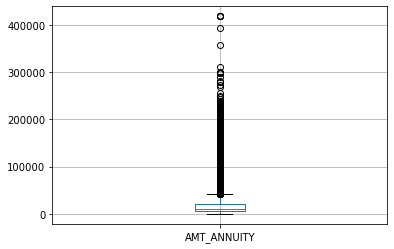

In [128]:
#Let's check for outliers for AMT_ANNUITY Column

previous_application.boxplot(column=['AMT_ANNUITY'])
plt.show()

In [129]:
#From boxplot we can see it has lot of outliers
#So Imputing AMT_ANNUITY with median as the distribution.

previous_application['AMT_ANNUITY'].fillna(previous_application['AMT_ANNUITY'].median(), inplace = True)

In [130]:
#Let's check the information

previous_application['AMT_GOODS_PRICE'].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [131]:
# We will impute AMT_GOODS_PRICE with mode as mean and median are not closer:
previous_application['AMT_GOODS_PRICE'].fillna(previous_application['AMT_GOODS_PRICE'].mode()[0], inplace=True)

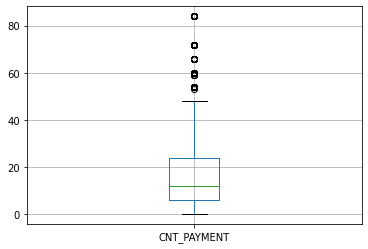

In [132]:
#CNT_PAYMENT

#Let's check for outliers for CNT_PAYMENT Column

previous_application.boxplot(column=['CNT_PAYMENT'])
plt.show()

In [133]:
# Lets check the relation of CNT_PAYMENT for records which has nulls wih NAME_CONTRACT_STATUS
previous_application.loc[previous_application['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

In [134]:
# Imputing CNT_PAYMENT with 0 as the NAME_CONTRACT_STATUS for these indicate that most of these loans were not started:
previous_application['CNT_PAYMENT'].fillna(0, inplace = True)

some null values are still there in the PRODUCT_COMBINATION column but We can ignore these values as the percentage of these values is very less.

In [135]:
#Checking the percentage of missing values for all the columns to ensure

null_percent_1 = 100.0*previous_application.isnull().sum()/len(previous_application)
null_percent_1

SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
AMT_ANNUITY                    0.000000
AMT_APPLICATION                0.000000
AMT_CREDIT                     0.000060
AMT_GOODS_PRICE                0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NAME_CONTRACT_STATUS           0.000000
DAYS_DECISION                  0.000000
NAME_PAYMENT_TYPE              0.000000
CODE_REJECT_REASON             0.000000
NAME_CLIENT_TYPE               0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_PORTFOLIO                 0.000000
NAME_PRODUCT_TYPE              0.000000
CHANNEL_TYPE                   0.000000
SELLERPLACE_AREA               0.000000
NAME_SELLER_INDUSTRY           0.000000
CNT_PAYMENT                    0.000000
NAME_YIELD_GROUP               0.000000


In [136]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1670214 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1670214 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

# Identifying Outliers in previous_application

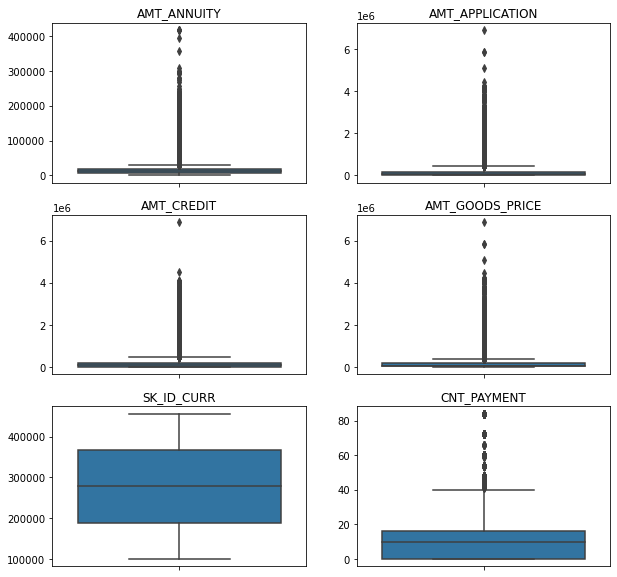

In [143]:
plt.figure(figsize=(10,10))

prev_outlier = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SK_ID_CURR','CNT_PAYMENT']

for i in enumerate(prev_outlier):
    plt.subplot(3,2,i[0]+1)
    sns.boxplot(y = previous_application[i[1]])
    plt.title(i[1])
    plt.ylabel("")

Observation:

AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have large number of outliers.

SK_ID_CURR has no outliers.

CNT_PAYMENT has less outlier values.

# Standardize Values

In [145]:
# converting -ve values to +ve values
previous_application['DAYS_DECISION']=previous_application['DAYS_DECISION'].abs()

In [146]:
previous_application['SELLERPLACE_AREA'] = previous_application['SELLERPLACE_AREA'].abs()

# Analysis of Merged Dataframes 

In [163]:
# We will make a left join because we need all the rows in the application data 
# So by making this left join, we get previous application data for each applicant.

#merge both the dataframe on SK_ID_CURR with left Joins
merged_application = pd.merge(application_data, previous_application, how='left', on='SK_ID_CURR', suffixes=('_Current', '_Previous'))
merged_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_Current,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_Current,AMT_ANNUITY_Current,AMT_GOODS_PRICE_Current,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_Current,HOUR_APPR_PROCESS_START_Current,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_GROUP,AMT_CREDIT_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_Previous,AMT_ANNUITY_Previous,AMT_APPLICATION,AMT_CREDIT_Previous,AMT_GOODS_PRICE_Previous,WEEKDAY_APPR_PROCESS_START_Previous,HOUR_APPR_PROCESS_START_Previous,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,medium,Low,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,606.0,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High,High,1810518.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12.0,Y,1.0,XNA,Approved,746.0,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,1.0,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High,High,2636178.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17.0,Y,1.0,XAP,Approved,828.0,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High,High,2396755.0,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,1

In [164]:
merged_application.shape

(1430155, 100)

In [165]:
merged_application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 100 columns):
 #   Column                               Non-Null Count    Dtype   
---  ------                               --------------    -----   
 0   SK_ID_CURR                           1430155 non-null  int64   
 1   TARGET                               1430155 non-null  int64   
 2   NAME_CONTRACT_TYPE_Current           1430155 non-null  object  
 3   CODE_GENDER                          1430155 non-null  object  
 4   FLAG_OWN_CAR                         1430155 non-null  object  
 5   FLAG_OWN_REALTY                      1430155 non-null  object  
 6   CNT_CHILDREN                         1430155 non-null  int64   
 7   AMT_INCOME_TOTAL                     1430155 non-null  float64 
 8   AMT_CREDIT_Current                   1430155 non-null  float64 
 9   AMT_ANNUITY_Current                  1430155 non-null  float64 
 10  AMT_GOODS_PRICE_Current              1430155 non-null

In [166]:
merged_application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_Current,AMT_ANNUITY_Current,AMT_GOODS_PRICE_Current,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_Current,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_ANNUITY_Previous,AMT_APPLICATION,AMT_CREDIT_Previous,AMT_GOODS_PRICE_Previous,HOUR_APPR_PROCESS_START_Previous,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413700e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06
mean,2.784702e+05,8.624240e-02,4.038870e-01,1.736036e+05,5.893386e+05,2.704189e+04,5.293758e+05,2.079102e-02,1.631495e+04,7.255951e+04,5.001275e+03,3.034492e+03,9.999993e-01,8.067175e-01,1.824732e-01,9.989917e-01,2.825792e-01,7.195793e-02,2.149006e+00,2.058179e+00,2.036176e+00,1.199401e+01,1.229377e-02,4.435953e-02,3.626041e-02,7.368082e-02,2.220151e-01,1.738609e-01,5.118497e-01,4.978161e-01,1.538150e+00,1.532512e-01,1.520324e+00,1.074548e-01,1.076470e+03,6.992249e-05,7.362195e-01,7.551629e-05,1.360202e-02,8.985390e-02,2.244512e-04,7.469540e-02,3.201751e-03,5.523877e-05,2.122148e-03,2.097675e-06,2.110960e-03,1.736175e-03,7.586590e-04,6.864291e-03,1.622202e-04,4.954708e-03,4.398125e-04,4.083473e-04,2.349396e-04,5.503599e-03,6.080460e-03,3.384039e-02,2.652251e-01,3.169475e-01,2.548950e+00,1.922744e+06,1.484032e+04,1.752436e+05,1.963541e+05,1.854396e+05,1.247893e+01,9.964321e-01,8.803670e+02,3.158884e+02,1.256367e+01
std,1.028021e+05,2.807218e-01,7.165176e-01,1.983303e+05,3.874204e+05,1.403958e+04,3.556441e+05,1.339810e-02,4.346737e+03,1.432601e+05,3.551626e+03,1.507182e+03,8.361967e-04,3.948728e-01,3.862342e-01,3.173746e-02,4.502536e-01,2.584183e-01,9.001573e-01,4.963435e-01,4.891555e-01,3.233163e+00,1.101937e-01,2.058927e-01,1.869375e-01,2.612509e-01,4.156014e-01,3.789899e-01,1.909532e-01,1.796804e-01,2.525672e+00,4.646596e-01,2.503920e+00,3.780070e-01,8.036986e+02,8.361678e-03,4.406818e-01,8.689686e-03,1.158318e-01,2.859724e-01,1.498002e-02,2.628993e-01,5.649338e-02,7.432076e-03,4.601788e-02,1.448334e-03,4.589668e-02,4.163127e-02,2.753333e-02,8.256620e-02,1.273554e-02,7.021511e-02,2.096710e-02,2.020349e-02,1.532594e-02,7.720087e-02,1.012908e-01,2.009888e-01,9.254467e-01,8.745520e-01

## Bivariate categorical analysis

NAME_CONTRACT_TYPE_Current  Cash loans  Revolving loans
NAME_CONTRACT_STATUS                                   
Approved                        816571            69528
Canceled                        241552            17889
Refused                         228351            17039
Unused offer                     20641             2130


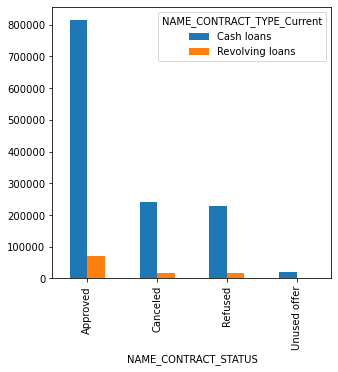

In [173]:
table = pd.crosstab(index=merged_application['NAME_CONTRACT_STATUS'],columns=merged_application['NAME_CONTRACT_TYPE_Current'])
print(table)
table.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()
#Cash loans have the highest count of Approved loans

Cash loans have the large no. of Approved loans

NAME_CONTRACT_TYPE_Current  Cash loans  Revolving loans
NAME_CONTRACT_STATUS                                   
Approved                        816571            69528
Canceled                        241552            17889
Refused                         228351            17039
Unused offer                     20641             2130


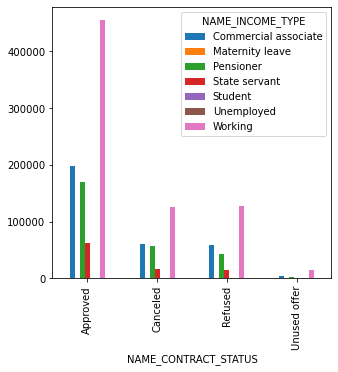

In [174]:
table_1 = pd.crosstab(index=merged_application['NAME_CONTRACT_STATUS'],columns=merged_application['NAME_INCOME_TYPE'])
print(table)
table_1.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

Here we can see Highest number of approvals for working applicant

NAME_CONTRACT_TYPE_Current  Cash loans  Revolving loans
NAME_CONTRACT_STATUS                                   
Approved                        816571            69528
Canceled                        241552            17889
Refused                         228351            17039
Unused offer                     20641             2130


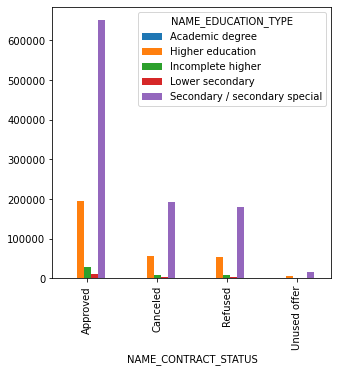

In [175]:
table_2 = pd.crosstab(index=merged_application['NAME_CONTRACT_STATUS'],columns=merged_application['NAME_EDUCATION_TYPE'])
print(table)
table_2.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

Secondary/secondary special educated applicant have high no. of approval

NAME_CONTRACT_TYPE_Current  Cash loans  Revolving loans
NAME_CONTRACT_STATUS                                   
Approved                        816571            69528
Canceled                        241552            17889
Refused                         228351            17039
Unused offer                     20641             2130


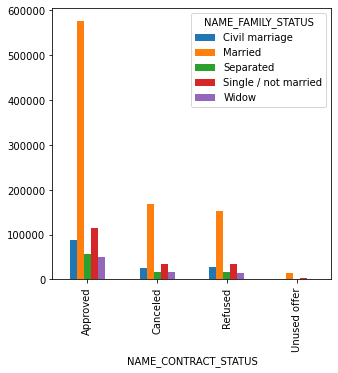

In [176]:
table_3 = pd.crosstab(index=merged_application['NAME_CONTRACT_STATUS'],columns=merged_application['NAME_FAMILY_STATUS'])
print(table)
table_3.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

Married applicants have higher approvals

NAME_CONTRACT_TYPE_Current  Cash loans  Revolving loans
NAME_CONTRACT_STATUS                                   
Approved                        816571            69528
Canceled                        241552            17889
Refused                         228351            17039
Unused offer                     20641             2130


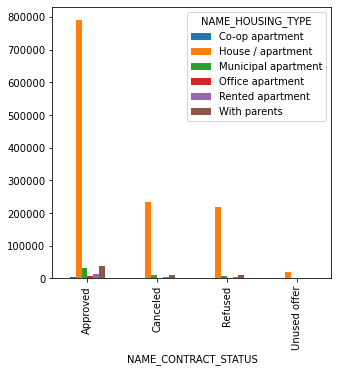

In [177]:
table_4 = pd.crosstab(index=merged_application['NAME_CONTRACT_STATUS'],columns=merged_application['NAME_HOUSING_TYPE'])
print(table)
table_4.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

House/apartment owner has higher approvals

NAME_CONTRACT_TYPE_Current  Cash loans  Revolving loans
NAME_CONTRACT_STATUS                                   
Approved                        816571            69528
Canceled                        241552            17889
Refused                         228351            17039
Unused offer                     20641             2130


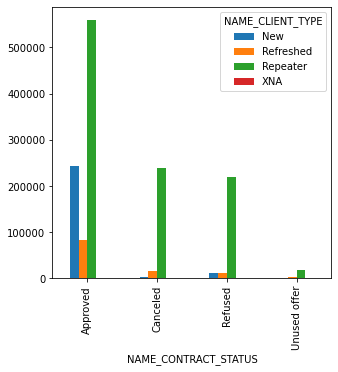

In [178]:
table_5 = pd.crosstab(index=merged_application['NAME_CONTRACT_STATUS'],columns=merged_application['NAME_CLIENT_TYPE'])
print(table)
table_5.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

Most number of times, repeated applications got approved

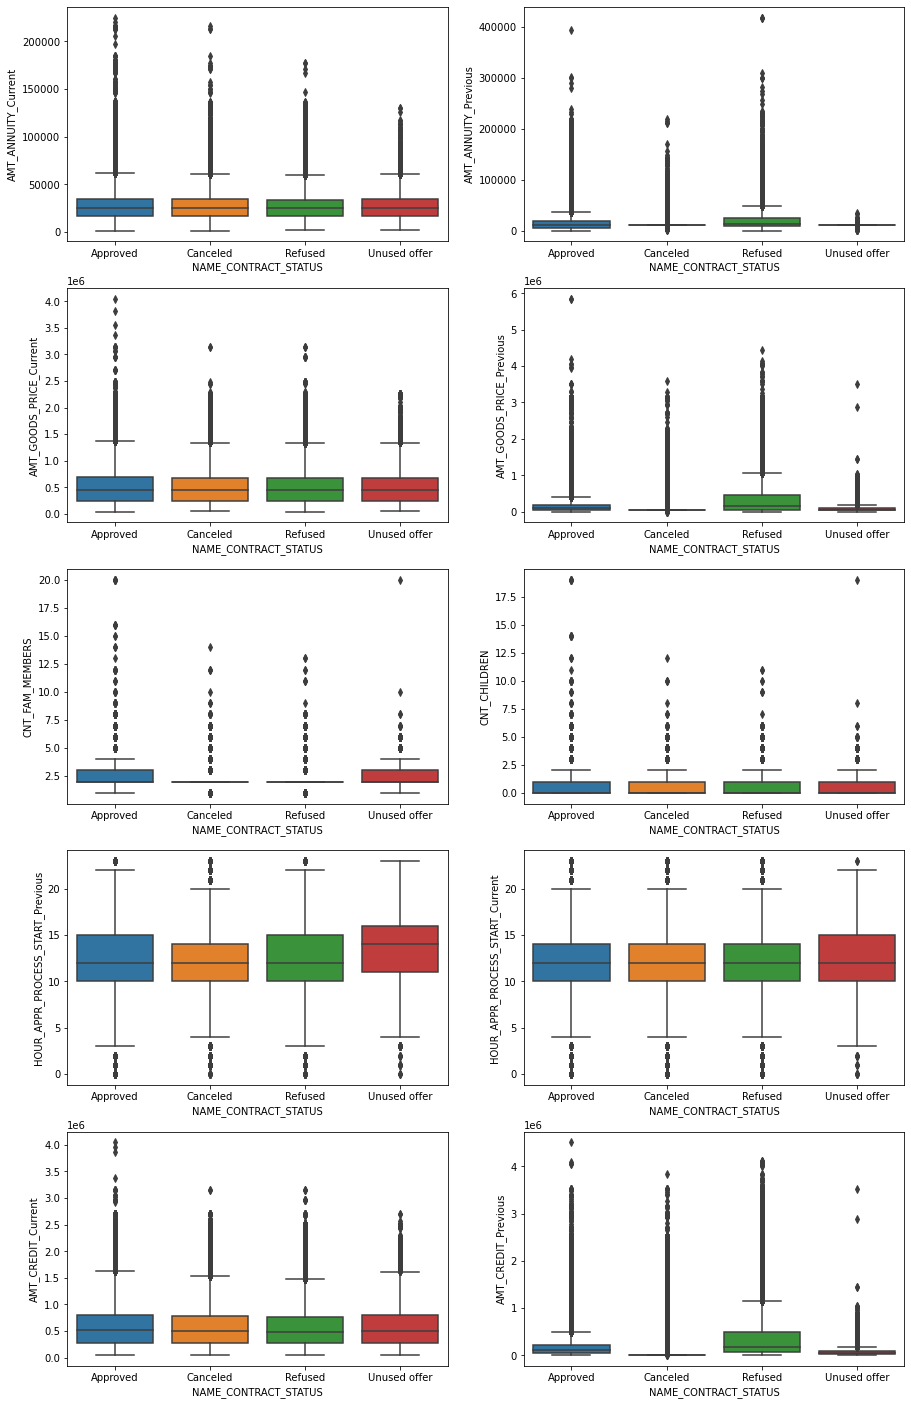

In [181]:
#Bi-variate continous plots

columns_2=['AMT_ANNUITY_Current','AMT_ANNUITY_Previous',
                   'AMT_GOODS_PRICE_Current','AMT_GOODS_PRICE_Previous','CNT_FAM_MEMBERS','CNT_CHILDREN',
                  'HOUR_APPR_PROCESS_START_Previous','HOUR_APPR_PROCESS_START_Current',
                   'AMT_CREDIT_Current','AMT_CREDIT_Previous']
                
plt.figure(figsize=(15,25))

for i in (enumerate(columns_2)):
    plt.subplot(len(columns_2)//2,2,i[0]+1)
    sns.boxplot(x='NAME_CONTRACT_STATUS', y = merged_application[i[1]].dropna(), data=merged_application)
plt.show() 

Observations:

Bank should reduce time spent on unused offer.

AMT_CREDIT_Previous has highest refused cases and AMT_CREDIT_Current is similar for all 4 cases.

Time spent in unused offer is higher as compared to other categories.

Previously most of the applications got cancelled/refused.

nuclear family(2-3 people in family) get highest approval.

# CONCLUSION

Banks should more focus on contract type 'Student' ,'pensioner' and 'Businessman' and having housing type other than 'Co-op apartment' for successful payments.

Go for clients from housing type 'With parents' as thees people are having least number of unsuccessful payments.

Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.

Target variable for Application dataset should be - TARGET

Target variable for Previous dataset should be - NAME_CONTRACT_STATUS

Following are the Major variables which are to be considered before approving application to minimize risk of loss.
    
AMT_ANNUITY

CODE_GENDER

AMT_CREDIT

AMT_INCOME_TOTAL

NAME_INCOME_TYPE

NAME_EDUCATION_TYPE

NAME_HOUSING_TYPE

DAYS_BIRTH

DAYS_EMPLOYED

NAME_CONTRACT TYPE